<ipython-input-52-b1e3b190c1fd>:40: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  area = simps(pressure_data, time)
<ipython-input-52-b1e3b190c1fd>:40: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  area = simps(pressure_data, time)
<ipython-input-52-b1e3b190c1fd>:40: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  area = simps(pressure_data, time)


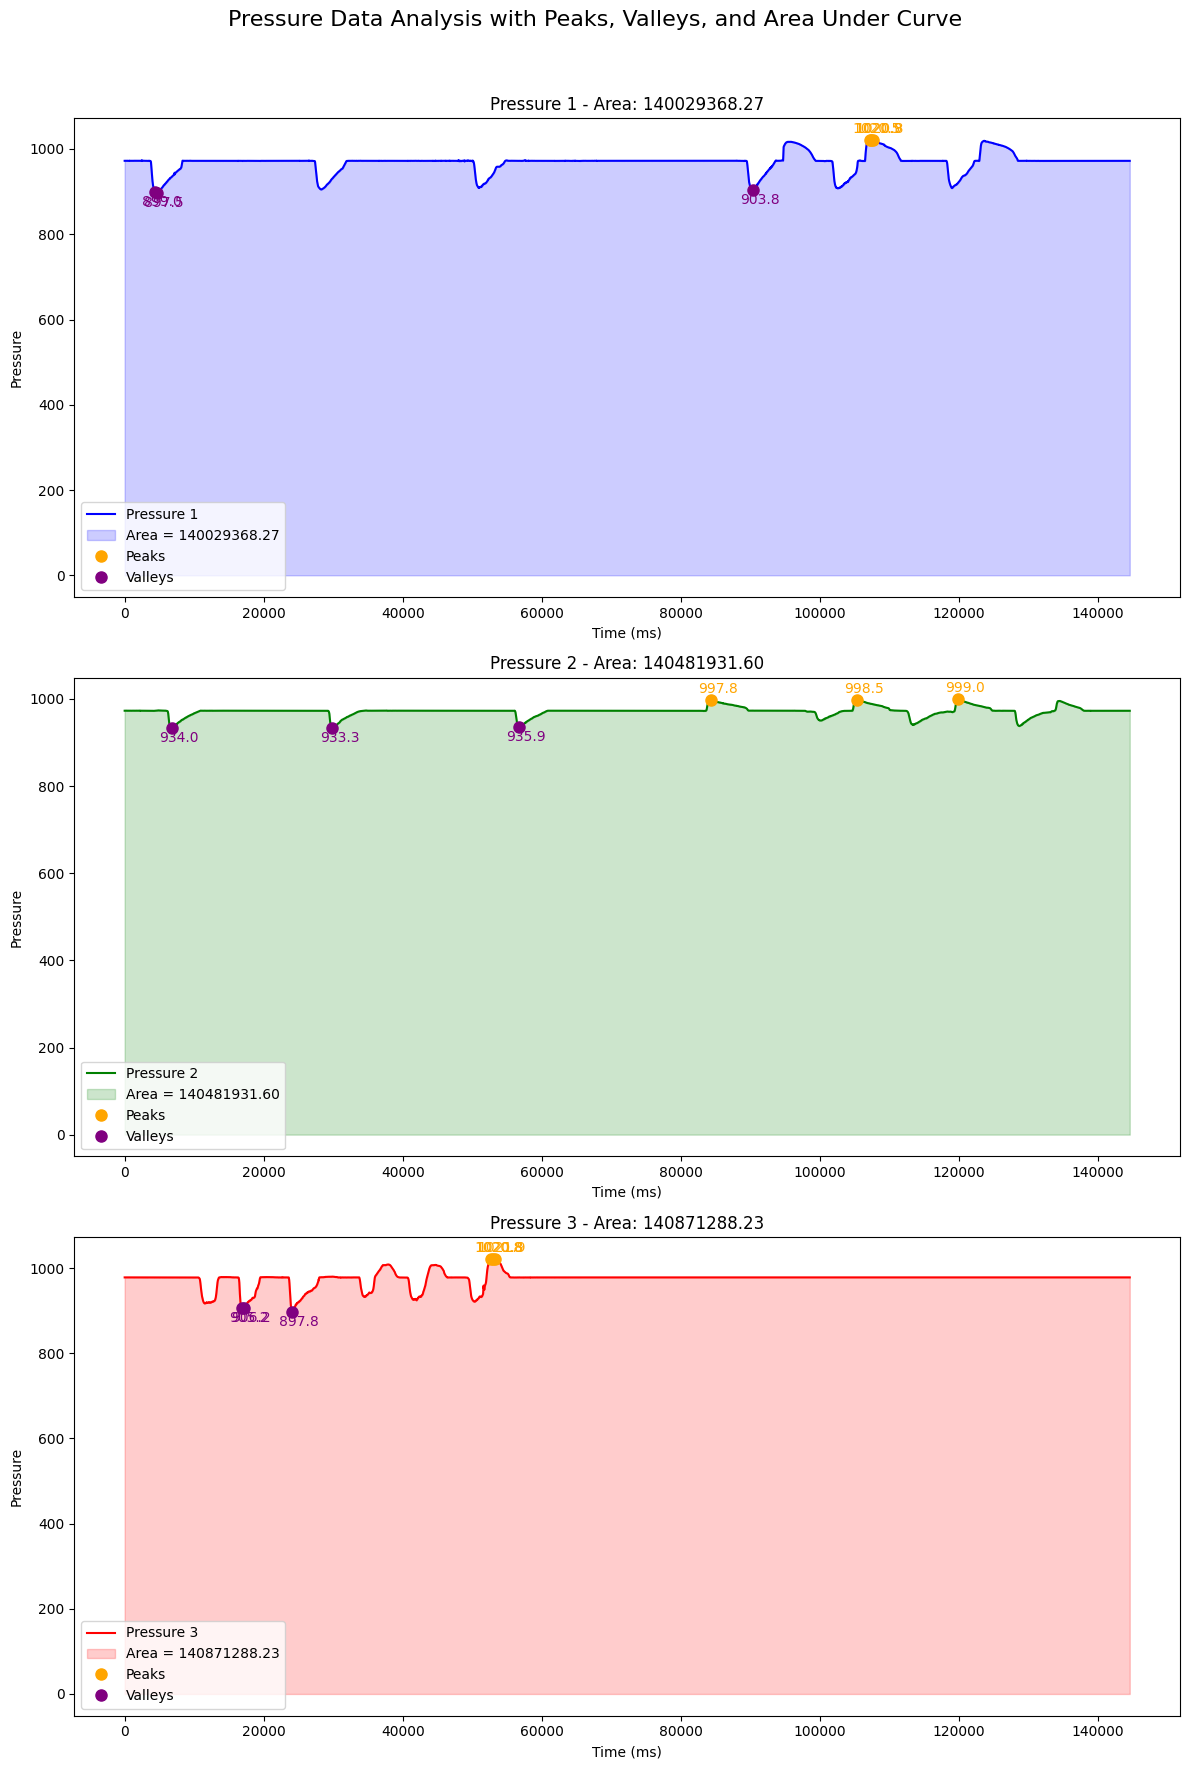

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.integrate import simps

# Load data
data = pd.read_csv('/alternatedynamicsData.csv')

# Convert columns to numeric, handling non-numeric entries
data = data.apply(pd.to_numeric, errors='coerce')

# Interpolate missing values
data.interpolate(method='linear', inplace=True)

# Extract time and pressure columns
time = data['time (ms)']
pressure_columns = ['Pressure 1', 'Pressure 2', 'Pressure 3']

# Initialize plot
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle("Pressure Data Analysis with Peaks, Valleys, and Area Under Curve", fontsize=16)

# Colors for each pressure data for clarity
colors = ['blue', 'green', 'red']

# Loop through each pressure column
for i, pressure_col in enumerate(pressure_columns):
    pressure_data = data[pressure_col]

    # Find peaks and valleys with prominence to ensure significant points are chosen
    peaks, _ = find_peaks(pressure_data, prominence=0.1, distance=20)
    valleys, _ = find_peaks(-pressure_data, prominence=0.1, distance=20)

    # Select the top 3 highest peaks and lowest valleys based on prominence
    peak_indices = peaks[np.argsort(pressure_data[peaks])][-3:]
    valley_indices = valleys[np.argsort(-pressure_data[valleys])][-3:]

    # Calculate area under the curve using Simpson's rule
    area = simps(pressure_data, time)

    # Plot pressure data
    axes[i].plot(time, pressure_data, label=f"{pressure_col}", color=colors[i], linewidth=1.5)
    axes[i].fill_between(time, pressure_data, color=colors[i], alpha=0.2, label=f"Area = {area:.2f}")

    # Mark peaks with orange markers and annotate
    axes[i].plot(time[peak_indices], pressure_data[peak_indices], "o", markersize=8, color="orange", label="Peaks")
    for j in peak_indices:
        axes[i].annotate(f"{pressure_data[j]:.1f}", (time[j], pressure_data[j]), textcoords="offset points", xytext=(5,5), ha='center', color="orange")

    # Mark valleys with purple markers and annotate
    axes[i].plot(time[valley_indices], pressure_data[valley_indices], "o", markersize=8, color="purple", label="Valleys")
    for j in valley_indices:
        axes[i].annotate(f"{pressure_data[j]:.1f}", (time[j], pressure_data[j]), textcoords="offset points", xytext=(5,-10), ha='center', color="purple")

    # Labels and legend
    axes[i].set_title(f"{pressure_col} - Area: {area:.2f}")
    axes[i].set_xlabel("Time (ms)")
    axes[i].set_ylabel("Pressure")
    axes[i].legend(loc="best")

# Adjust layout to ensure no overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
